# Eerste Markdown cell

(last updated: June 19, 2023)

Test van Chris

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [18]:
temperature_data = pd.read_csv('Temperature_change_cleaned.csv')
temperature_dataframe = pd.DataFrame(temperature_data)
temperature_dataframe.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [19]:
co2_data = pd.read_csv('CO2_emissions_cleaned.csv')
co2_dataframe = pd.DataFrame(co2_data)
co2_dataframe.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [20]:
methane_data = pd.read_csv('Methane_emissions_cleaned.csv')
methane_dataframe = pd.DataFrame(methane_data)
methane_dataframe.head()

,Country,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,China,Total excluding LUCF,CH4,MTCO2e,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
1,Russia,Total excluding LUCF,CH4,MTCO2e,849.57,850.17,852.55,835.56,830.22,825.64,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
2,India,Total excluding LUCF,CH4,MTCO2e,666.51,661.61,657.69,652.00,653.67,653.53,...,584.49,577.29,567.46,560.74,551.49,543.90,539.00,533.31,528.53,522.74
3,United States,Total excluding LUCF,CH4,MTCO2e,622.59,614.50,609.20,617.17,620.81,618.41,...,688.34,702.98,722.83,738.60,745.84,758.52,751.48,768.67,769.82,766.55
4,Brazil,Total excluding LUCF,CH4,MTCO2e,416.28,421.66,424.80,422.28,416.35,411.88,...,322.94,318.14,311.06,304.62,311.55,311.16,305.47,304.56,300.17,285.24


In [21]:
elnino_data = pd.read_csv('ElNino_LaNina_cleaned.csv')
elnino_dataframe = pd.DataFrame(elnino_data)
elnino_dataframe.head()

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


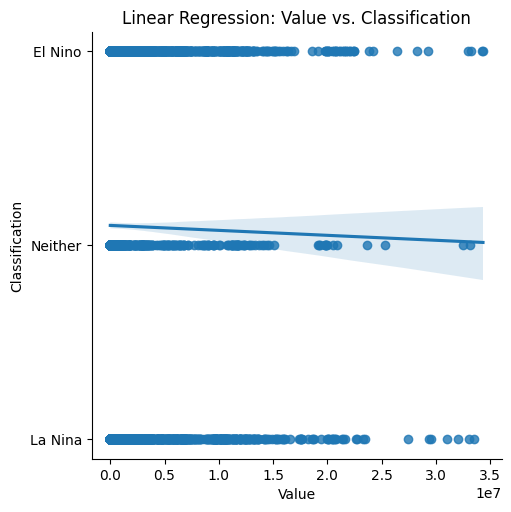

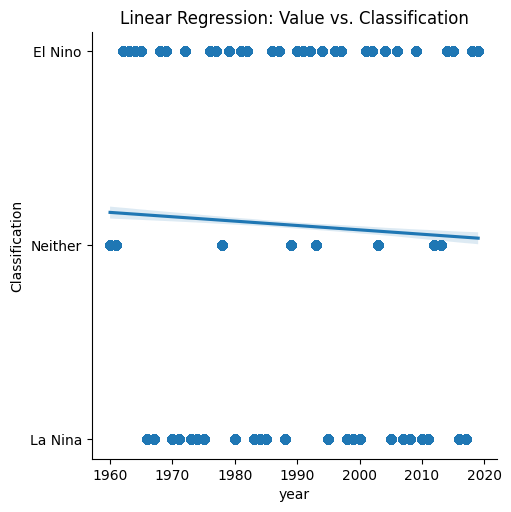

In [50]:
# Daniel

CO2_elnino_df = pd.read_csv('CO2_merge_elnino_lanina.csv')


sns.lmplot(data=CO2_elnino_df, x='value', y='Classification')
plt.yticks([0, 1, 2], ['La Nina', 'Neither', 'El Nino'])
plt.xlabel('Value')
plt.ylabel('Classification')
plt.title('Linear Regression: Value vs. Classification')
plt.show()

sns.lmplot(data=CO2_elnino_df, x='year', y='Classification')
plt.yticks([0, 1, 2], ['La Nina', 'Neither', 'El Nino'])
plt.xlabel('year')
plt.ylabel('Classification')
plt.title('Linear Regression: Value vs. Classification')
plt.show()
